## Generating a cumulative return series

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" starting from 2021-01-01 using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", start_date="2021-01-01", provider="yfinance")

In [4]:
display(df)

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900,0.0
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0.0
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0
...,...,...,...,...,...,...
2025-01-27,224.020004,232.149994,223.979996,229.860001,94863400,0.0
2025-01-28,230.850006,240.190002,230.809998,238.259995,75707600,0.0
2025-01-29,234.119995,239.860001,234.009995,239.360001,45486100,0.0


Selects the 'close' column from 'df' and stores it in 'close'

In [5]:
close = df["close"]

In [6]:
display(close)

date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2025-01-27    229.860001
2025-01-28    238.259995
2025-01-29    239.360001
2025-01-30    237.589996
2025-01-31    236.000000
Name: close, Length: 1025, dtype: float64

Calculates the percentage change of the 'close' prices and stores it in 'returns'

In [7]:
returns = close.pct_change()

In [8]:
display(returns)

date
2021-01-04         NaN
2021-01-05    0.012364
2021-01-06   -0.033662
2021-01-07    0.034123
2021-01-08    0.008631
                ...   
2025-01-27    0.031780
2025-01-28    0.036544
2025-01-29    0.004617
2025-01-30   -0.007395
2025-01-31   -0.006692
Name: close, Length: 1025, dtype: float64

Replaces NaN values in 'returns' with 0

In [9]:
returns[np.isnan(returns)] = 0

In [10]:
display(returns)

date
2021-01-04    0.000000
2021-01-05    0.012364
2021-01-06   -0.033662
2021-01-07    0.034123
2021-01-08    0.008631
                ...   
2025-01-27    0.031780
2025-01-28    0.036544
2025-01-29    0.004617
2025-01-30   -0.007395
2025-01-31   -0.006692
Name: close, Length: 1025, dtype: float64

Adds 1 to the 'returns' to prepare for cumulative product calculation

In [11]:
returns += 1

In [12]:
display(returns)

date
2021-01-04    1.000000
2021-01-05    1.012364
2021-01-06    0.966338
2021-01-07    1.034123
2021-01-08    1.008631
                ...   
2025-01-27    1.031780
2025-01-28    1.036544
2025-01-29    1.004617
2025-01-30    0.992605
2025-01-31    0.993308
Name: close, Length: 1025, dtype: float64

Calculates the cumulative returns and subtracts 1 to get the final cumulative returns

In [13]:
cumulative_returns = returns.cumprod() - 1

In [14]:
display(cumulative_returns)

date
2021-01-04    0.000000
2021-01-05    0.012364
2021-01-06   -0.021714
2021-01-07    0.011668
2021-01-08    0.020400
                ...   
2025-01-27    0.776215
2025-01-28    0.841125
2025-01-29    0.849625
2025-01-30    0.835948
2025-01-31    0.823661
Name: close, Length: 1025, dtype: float64

Plots the cumulative returns

<Axes: xlabel='date'>

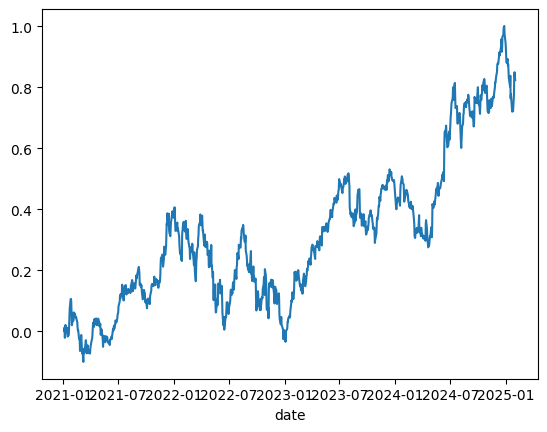

In [15]:
cumulative_returns.plot()

Calculates the log returns of 'close' prices

In [16]:
log_returns = np.log(close / close.shift())

In [17]:
display(log_returns)

date
2021-01-04         NaN
2021-01-05    0.012288
2021-01-06   -0.034241
2021-01-07    0.033554
2021-01-08    0.008594
                ...   
2025-01-27    0.031286
2025-01-28    0.035892
2025-01-29    0.004606
2025-01-30   -0.007422
2025-01-31   -0.006715
Name: close, Length: 1025, dtype: float64

Calculates the cumulative sum of the log returns to get the cumulative log returns

In [18]:
cumulative_log_returns = log_returns.cumsum()

In [19]:
display(cumulative_log_returns)

date
2021-01-04         NaN
2021-01-05    0.012288
2021-01-06   -0.021953
2021-01-07    0.011601
2021-01-08    0.020195
                ...   
2025-01-27    0.574485
2025-01-28    0.610377
2025-01-29    0.614983
2025-01-30    0.607561
2025-01-31    0.600846
Name: close, Length: 1025, dtype: float64

Plots the cumulative log returns

<Axes: xlabel='date'>

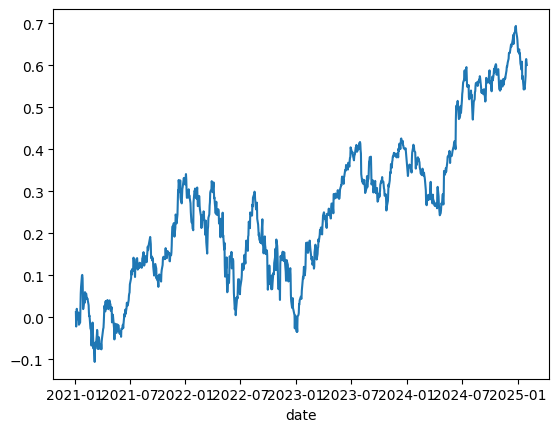

In [20]:
cumulative_log_returns.plot()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.